In [53]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore


def preprocessing(d, method='zscore', nfeatures=30):
    if method == 'zscore':
        return zscore(d)
    elif method == 'standardscaler':
        scaler = StandardScaler()
        scaler.fit(d)
        StandardScaler(copy=True, with_mean=True, with_std=True)
        scaler.transform(d)
        return d
    elif method == 'featureselection':
        train = np.concatenate((d[:179], labels[:, np.newaxis]), axis=1)
        cov_mat = np.cov(train)
        cov = cov_mat[-1][:-1]              # covariance matrix of each feature wrt label feature
        args = np.argsort(cov)[::-1][:nfeatures]   # top n highest covariances
        return d[:, args]
        

def do_pca(d, n):
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(d)
    varsum = np.sum(pca.explained_variance_ratio_) * 100
    print('PCA: Percentage of variance in selected principle components: {:.2f}%'.format(varsum))
    return pca_result
    
    
def do_tsne(d):
    seed = 3200
    tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=700, random_state=seed)
    return tsne.fit_transform(pca_result).T
    
    
def tsne_plot(d):
    x, y = d
    plt.figure(figsize=(5,5), dpi=70)
    plt.title('t-SNE analysis')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.scatter(x[179:], y[179:], c='darkgrey', s=10)
    plt.scatter(x[:179], y[:179], c=labels, cmap='jet', s=10)
    plt.show()

# import d
data_raw = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('labels.csv', delimiter=',')

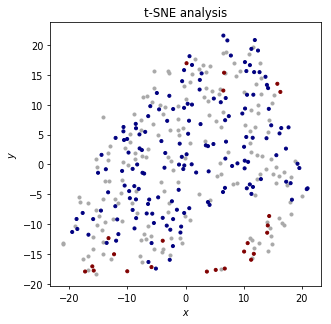

In [34]:
# only tsne
tsne_result = do_tsne(data_raw)
tsne_plot(tsne_result)

PCA: Percentage of variance in selected principle components: 85.12%


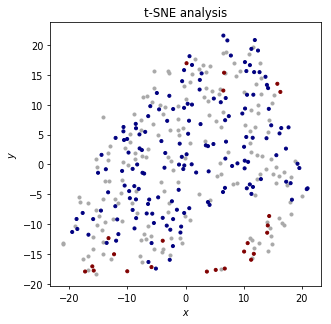

In [37]:
# pca, tsne
pca_result = do_pca(data_raw, 5)
tsne_result = do_tsne(pca_result)
tsne_plot(tsne_result)

PCA: Percentage of variance in selected principle components: 67.66%


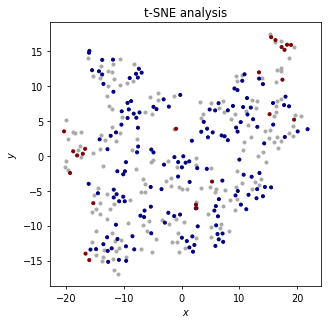

In [39]:
# pca (3), tsne
pca_result = do_pca(data_raw, 3)
tsne_result = do_tsne(pca_result)
tsne_plot(tsne_result)

PCA: Percentage of variance in selected principle components: 59.14%


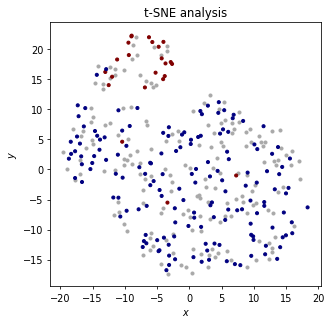

In [35]:
# zscore selection, pca, tsne
data = preprocessing(data_raw)
pca_result = do_pca(data, 5)
tsne_result = do_tsne(pca_result)
tsne_plot(tsne_result)

PCA: Percentage of variance in selected principle components: 85.12%


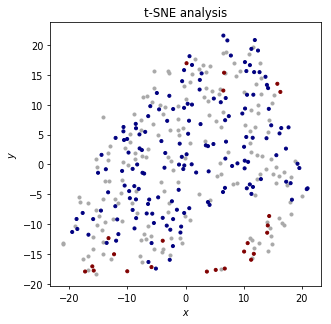

In [36]:
# standard scaling, pca, tsne
data = preprocessing(data_raw, method='standardscaler')
pca_result = do_pca(data, 5)
tsne_result = do_tsne(pca_result)
tsne_plot(tsne_result)

PCA: Percentage of variance in selected principle components: 66.79%


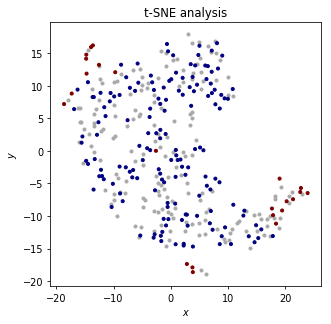

In [55]:
# z score, feature selection, pca, tsne
data = preprocessing(data_raw, method='zscore')
data = preprocessing(data, method='featureselection', nfeatures=30)
pca_result = do_pca(data, 5)
tsne_result = do_tsne(pca_result)
tsne_plot(tsne_result)